In [24]:
from groo.groo import get_root
root_dir = get_root(".root_dir_covid")

import os

print(root_dir)
import sys
sys.path.append(os.path.join(root_dir, "covid-fear", "scripts"))
sys.path.append(os.path.join(root_dir, "covid-fear", "scripts", "lib"))



import numpy as np
import pandas as pd
from cov_functions import *
from clustering_functions import *
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
import pingouin as pg
from statsmodels.stats.multitest import multipletests
#import itertools
warnings.filterwarnings('ignore')
#import bambi as bmb
#import arviz as az
#import json
#import pickle
#import tslearn as tsl

# load main dataset
df = pd.read_csv(os.path.join(root_dir, "data", "full_dataset_only_complete_based_on_sess_avg.csv"))
#sys.path.insert(1, os.path.join(root_dir, "covid-fear", "scripts", "lib", "hoeffding"))

##### VERY IMPORTANT ####
df = df.rename(columns={
                        "cases14_std_unsmooth": "cases", 
                        "deaths14_std_unsmooth": "deaths", 
                        "q7_period_rel_danger": "perceived_danger", 
                        "q7_period_rel_safety": "perceived_safety", 
                        "q7_worry_econ_impact": "econ_worry", 
                        "worryhealth": "health_worry", 
                        "prob_est": "ProbEst", 
                        "covid_worry": "Worry", 
                        "q7_avoid": "Avoid", 
                        "q6_apply_soc_dist": "SocialDist", 
                        "q6_media_freq_num": "InfSeek" })

df["Session"] = df["session"] +1


lette = ["black", "seagreen", "firebrick", "deeppink", "darkorange", "dodgerblue", "indigo"]


/data/drive/postdoc/Project4_covid


In [25]:
# Create column with appropriate dates

df["date"] = pd.to_datetime( df["submitdate"]).dt.strftime("%B '%y")
months = df.groupby(by="Session")["date"].apply(lambda x: np.array(x.reset_index().iloc[0,1])).reset_index()
months["session"] = months["Session"]-1


## Figure 1: overall plot 

In [26]:
def base_corr(x):
    """
    Baseline correct to forst value (series should start from 0 after operation)
    """
    #x = np.array(x) 
    x = x.reset_index(drop=True).astype(float)
    #print(x)
    x = x - x.iloc[x.index[0]]
    #x = x - x[0]
    return x


# normalize within participant
#df["econ_worry_norm"]= df.groupby(by="PROLIFICID")["econ_worry"].apply(normalize)
#sdf["health_worry_norm"]= df.groupby(by="PROLIFICID")["health_worry"].apply(normalize)
#columns = ["deaths", "cases", "perceived_danger", "ProbEst", "Avoid", "InfSeek", ]#,  "econ_worry", "health_worry"]
columns = ["deaths", "perceived_danger", "ProbEst", "Worry", "Avoid", "InfSeek", ]#,  "econ_worry", "health_worry"]
tdf = df.loc[:,["Session", "PROLIFICID"]+columns]
for c in columns: 
    tdf[c] = tdf.groupby(by="PROLIFICID")[c].apply(normalize)#.apply(base_corr)#  #apply(lambda x: x - x[0])
    test = tdf.groupby(by="PROLIFICID")[c].apply(base_corr)
    tdf[c] = np.array(test)
tdf = tdf.melt(id_vars = ["Session", "PROLIFICID"], value_vars=columns)

#

In [27]:
x = lambda A : A - A[0]
import numpy as np

print(x(np.array([1,2,3,4,5-3,-3])))

[ 0  1  2  3  1 -4]


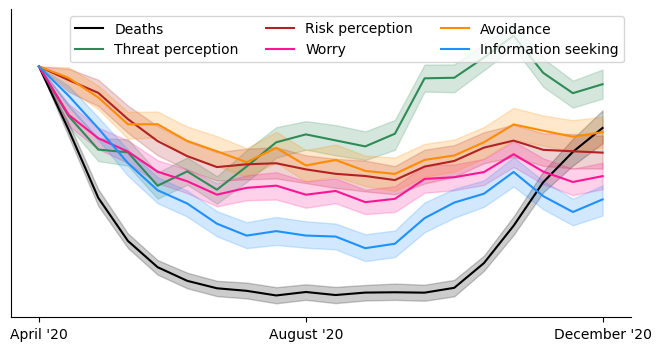

In [28]:

#scolumns = ["econ_worry_norm", "health_worry_norm"]

# normalize within participant


f,ax = plt.subplots(1,1, figsize=(8,4))
ax = sns.lineplot(data=tdf, x="Session", y="value", hue="variable", ax=ax, legend=True, palette=lette)
ax.set_ylabel("")
ax.set_yticklabels("")
ax.get_legend().set_title("")
sessions = np.array([1,10,20])-1
ax.set_xticks(months["Session"].iloc[sessions])
ax.set_xticklabels(months["date"].iloc[sessions])
ax.set_xlabel("")
plt.tick_params(left = False)
#sns.move_legend(ax, "upper center",  ncol=2, bbox_to_anchor=(0.42, 1.12)) #bbox_to_anchor=(1.3, 1),
sns.move_legend(ax, "right",  ncol=1, bbox_to_anchor=(0.22, 1.22)) #bbox_to_anchor=(1.3, 1),
sns.despine(fig=f, ax=ax, top=True)

#new_labels = ["Deaths", "Cases", "Current threat",  "Probability estimates" ,"Avoidance", "Information seeking"]
new_labels = ["Deaths","Threat perception",  "Risk perception", "Worry", "Avoidance", "Information seeking"]

ax.get_legend().get_frame().set_linewidth(0.0)
ax.legend(ncol=3)

for t, l  in zip(ax.get_legend().texts, new_labels):
    t.set_text(l)

plt.savefig(os.path.join(root_dir, 'output', 'figures', 'time_descriptive',  'fig_raw.pdf'), dpi=300, quality=80, optimize=True, progressive=True)  
plt.savefig(os.path.join(root_dir, 'covid-fear', 'scripts', 'submissions_and_outputs',   'paper_figures', 'timecourses',  'longit_data.pdf'), dpi=300, quality=80, optimize=True, progressive=True)  



### Figure with full questions

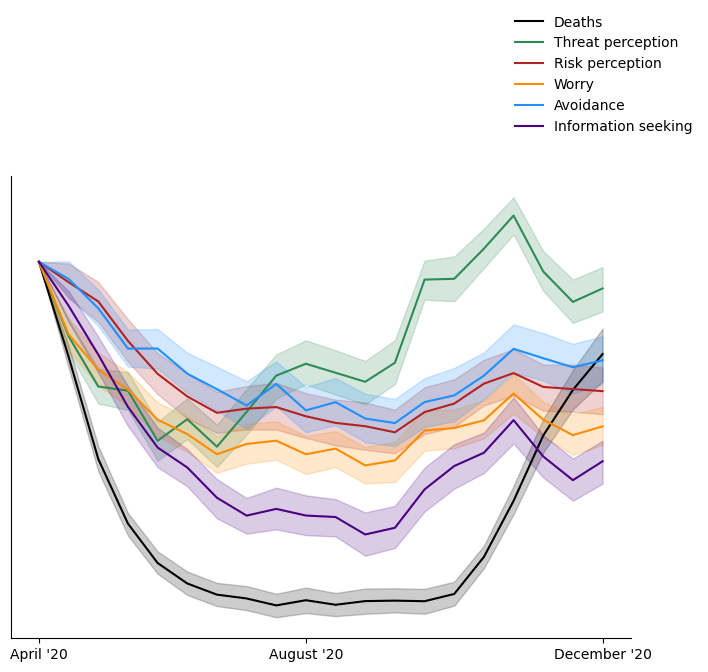

In [29]:
#scolumns = ["econ_worry_norm", "health_worry_norm"]

# normalize within participant



f,ax = plt.subplots(1,1, figsize=(8,6))
ax = sns.lineplot(data=tdf, x="Session", y="value", hue="variable", ax=ax, legend=True, palette=lette)
ax.set_ylabel("")
ax.set_yticklabels("")
ax.get_legend().set_title("")
sessions = np.array([1,10,20])-1
ax.set_xticks(months["Session"].iloc[sessions])
ax.set_xticklabels(months["date"].iloc[sessions])
ax.set_xlabel("")
plt.tick_params(left = False)
#sns.move_legend(ax, "upper center",  ncol=2, bbox_to_anchor=(0.42, 1.12)) #bbox_to_anchor=(1.3, 1),
sns.move_legend(ax, "right",  ncol=1, bbox_to_anchor=(1.12, 1.22)) #bbox_to_anchor=(1.3, 1),
sns.despine(fig=f, ax=ax, top=True)

new_labels = ["Deaths", "Threat perception",  "Risk perception", "Worry", "Avoidance", "Information seeking"]

ax.get_legend().get_frame().set_linewidth(0.0)
#ax.legend(ncol=3)

for t, l  in zip(ax.get_legend().texts, new_labels):
    t.set_text(l)

plt.savefig(os.path.join(root_dir, 'output', 'figures', 'time_descriptive',  'fig_raw_2.pdf'), dpi=300, quality=80, optimize=True, progressive=True)  


### Fig - onlu sessions 1-10 

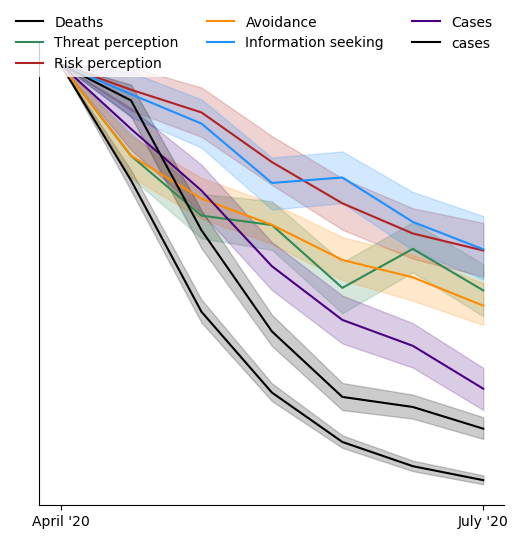

In [30]:
# normalize within participant
#df["econ_worry_norm"]= df.groupby(by="PROLIFICID")["econ_worry"].apply(normalize)
#sdf["health_worry_norm"]= df.groupby(by="PROLIFICID")["health_worry"].apply(normalize)

session_cutoff = 8

columns = ["deaths",  "perceived_danger", "ProbEst", "Worry", "Avoid", "InfSeek", "cases"]#,  "econ_worry", "health_worry"]
tdf = df.loc[(df["Session"]<=session_cutoff),["Session", "PROLIFICID"]+columns]
for c in columns: 
    tdf[c] = tdf.groupby(by="PROLIFICID")[c].apply(normalize)#.apply(base_corr)#  #apply(lambda x: x - x[0])
    test = tdf.groupby(by="PROLIFICID")[c].apply(base_corr)
    tdf[c] = np.array(test)
tdf = tdf.melt(id_vars = ["Session", "PROLIFICID"], value_vars=columns)

f,ax = plt.subplots(1,1, figsize=(6,6))
ax = sns.lineplot(data=tdf, x="Session", y="value", hue="variable", ax=ax, legend=True, palette=lette)
ax.set_ylabel("")
ax.set_yticklabels("")
ax.get_legend().set_title("")
sessions = np.array([1,session_cutoff-1])-1
ax.set_xticks(months["Session"].iloc[sessions])
ax.set_xticklabels(months["date"].iloc[sessions])
ax.set_xlabel("")
plt.tick_params(left = False)
#sns.move_legend(ax, "upper center",  ncol=2, bbox_to_anchor=(0.42, 1.12)) #bbox_to_anchor=(1.3, 1),
sns.move_legend(ax, "right",  ncol=3, bbox_to_anchor=(1, 1)) #bbox_to_anchor=(1.3, 1),
sns.despine(fig=f, ax=ax, top=True)

#new_labels = ["Deaths", "Cases",  "Current threat ('Are we currently in a period of danger?')",  "Probability estimates ('What is the probability that you will get infected by the virus?')", "Avoidance ('I avoid going to public places.')", "Information seeking ('How often do you get informatino about COVID-19 from the media?')"]
new_labels = ["Deaths", "Threat perception",  "Risk perception", "Avoidance", "Information seeking", "Cases"]
ax.get_legend().get_frame().set_linewidth(0.0)
#ax.legend(ncol=3)

for t, l  in zip(ax.get_legend().texts, new_labels):
    t.set_text(l)

plt.savefig(os.path.join(root_dir, 'output', 'figures', 'time_descriptive',  'fig_raw__wave1_sess1-8.pdf'), dpi=300, quality=80, optimize=True, progressive=True)  
plt.savefig(os.path.join(root_dir, 'covid-fear', 'scripts', 'submissions_and_outputs',   'paper_figures', 'timecourses',  'longit_data_wave1.pdf'), dpi=300, quality=80, optimize=True, progressive=True)  


### session1 8+ 

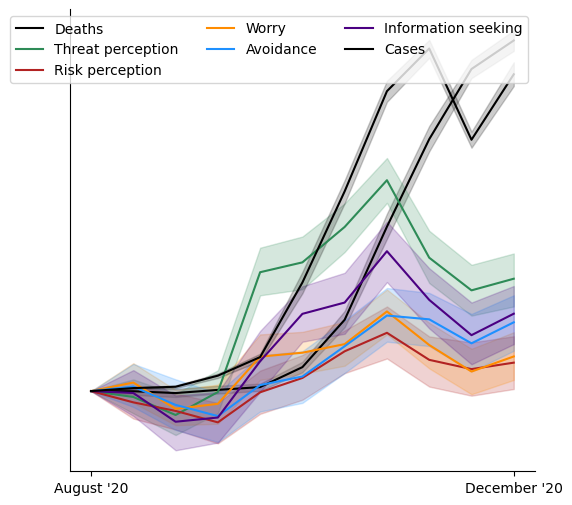

In [31]:
session_cutoff = 10

columns = ["deaths", "perceived_danger", "ProbEst", "Worry", "Avoid", "InfSeek", "cases" ]#,  "econ_worry", "health_worry"]
tdf = df.loc[(df["Session"]>session_cutoff),["Session", "PROLIFICID"]+columns]
for c in columns: 
    tdf[c] = tdf.groupby(by="PROLIFICID")[c].apply(normalize)#.apply(base_corr)#  #apply(lambda x: x - x[0])
    test = tdf.groupby(by="PROLIFICID")[c].apply(base_corr)
    tdf[c] = np.array(test)
tdf = tdf.melt(id_vars = ["Session", "PROLIFICID"], value_vars=columns)

f,ax = plt.subplots(1,1, figsize=(6,6))
ax = sns.lineplot(data=tdf, x="Session", y="value", hue="variable", ax=ax, legend=True, palette=lette)
ax.set_ylabel("")
ax.set_yticklabels("")
ax.get_legend().set_title("")
sessions = np.array([session_cutoff, 20])-1
ax.set_xticks(months["Session"].iloc[sessions])
ax.set_xticklabels(months["date"].iloc[sessions])
ax.set_xlabel("")
plt.tick_params(left = False)
#sns.move_legend(ax, "upper center",  ncol=2, bbox_to_anchor=(0.42, 1.12)) #bbox_to_anchor=(1.3, 1),
sns.move_legend(ax, "right",  ncol=3, bbox_to_anchor=(1, 1)) #bbox_to_anchor=(1.3, 1),
sns.despine(fig=f, ax=ax, top=True)

#new_labels = ["Deaths", "Cases",  "Current threat ('Are we currently in a period of danger?')",  "Probability estimates ('What is the probability that you will get infected by the virus?')", "Avoidance ('I avoid going to public places.')", "Information seeking ('How often do you get informatino about COVID-19 from the media?')"]
new_labels = ["Deaths", "Threat perception",  "Risk perception", "Worry", "Avoidance", "Information seeking", "Cases"]
ax.get_legend().get_frame().set_linewidth(0.0)
ax.legend(ncol=3)

for t, l  in zip(ax.get_legend().texts, new_labels):
    t.set_text(l)

plt.savefig(os.path.join(root_dir, 'output', 'figures', 'time_descriptive',  'fig_raw__wave2_sess9-20.pdf'), dpi=300, quality=80, optimize=True, progressive=True)  
plt.savefig(os.path.join(root_dir, 'covid-fear', 'scripts', 'submissions_and_outputs',  'paper_figures', 'timecourses', 'longit_data_wave2.pdf'), dpi=300, quality=80, optimize=True, progressive=True)  


## Figure 2

In [32]:
trait_factor_names = ["TF1_CognAnxDepr", "TF2_PhysiolAnx", "TF3_NegativeAffect"]


for depvar in ["perceived_danger"]:#, "CovidWorry", "ProbEst"]:
    tdf = df.loc[:,[depvar]+["session", "PROLIFICID"]]
    tdf = tdf.pivot(index='PROLIFICID', columns='session', values=depvar).add_prefix('sess')

    # Vrey important, otherwise clustering doesn't work! 
    tdf = tdf.interpolate(method='linear', axis=1)

    # turn to timeseries data type
    ts = to_time_series(tdf)

    tdf, m = estimate_clusters(ts,tdf, n_clusters=2, metric="euclidean")

    # get information from the model
    ts = to_time_series(tdf.drop(columns=["cl", "id"]))
    cl_ids = m.predict(ts) 
    clusters = np.transpose(np.squeeze(m.cluster_centers_))
    (unique, counts) = np.unique(cl_ids, return_counts=True)

    # where will labels be shown 
    y = clusters[18,:]
    me=tdf[["sess18", "cl"]].groupby("cl").mean()
    yme=np.array(me["sess18"])

    # turn back to long format
    tdf2 = tdf.melt(id_vars=["id", "cl"], value_vars=["sess"+str(x) for x in range(20)]).set_index("id")

    pal = []
    palc= []
    n_clusters = 2
    for nc in range(n_clusters): 
        col = sns.cubehelix_palette(start=nc, rot=-.1, n_colors=3)
        pal.append(col)
        palc.append(col[1])

    # plot 

    fi, ax = plt.subplots(1,2,figsize=(13,5) ) 
    pal=sns.color_palette("rocket_r", n_clusters)
    pal=["firebrick", "tomato"]
    f = sns.lineplot(data=tdf2, x="session", y="value", hue="cl", palette=pal, ax=ax[0], legend=False)
    f.set_xticklabels([str(i) for i in range(20)])
    f.set_ylabel(depvar) 
    sessions = np.array([1,10,20])-1
    f.set_xticks(months["session"].iloc[sessions])
    f.set_xticklabels(months["date"].iloc[sessions])
    plt.tick_params(left = False)
    sns.despine(fig=fi, ax=f, top=True)

    #fig, ax = plt.subplots(1,len(huevar), figsize=(len(huevar)*4, 5))
    #for f_idx, hv in enumerate(huevar):

        # add anxiety to the dataset
    stdf = tdf2.join(df.loc[:,["PROLIFICID"]+trait_factor_names].groupby("PROLIFICID").mean())

        # Set your custom color palette
    #    pal=sns.color_palette("rocket_r", n_clusters)
        
        #get mean anxiety per bin
    anx_cluster = stdf.loc[:,["cl"]+trait_factor_names].groupby(["cl"]).mean()
    #    plt.ylabel(dep_var)
    x = 18
    for i,v,c,y in zip(np.array(anx_cluster.index),unique, counts,yme):
        #f.annotate("n="+str(c)+" cluster="+str(v), (x,y),   bbox=dict(boxstyle="round", fc="w", edgecolor=pal[i]))
        f.annotate("n="+str(c), (x,y),   bbox=dict(boxstyle="round", fc="w", edgecolor=pal[i]))


    ### show second plot
    stdf = tdf.loc[:,["id", "cl"]].join(df.loc[:,["PROLIFICID"]+trait_factor_names].groupby("PROLIFICID").mean())
    #for t in trait_factor_names:
    #    stdf[t] =  stdf[t] - stdf[t].min() 
    stdf = stdf.melt(id_vars=["id", "cl"], value_vars=trait_factor_names).set_index("id")


    ax[1]=sns.barplot(data=stdf, x="cl", y="value", hue="variable", errorbar="se", ax=ax[1],  palette=sns.color_palette("viridis", 3))
    ax[1].set_ylabel("") 
    ax[1].get_legend().set_title("")
    new_labels =["Cognitive Anxiety and Depression", "Somatic Anxiety", "Negative Affect"]
    for t, l  in zip(ax[1].get_legend().texts, new_labels):
        t.set_text(l)
    plt.tick_params(left = False)
    sns.despine(fig=fi, ax=ax[1], top=True)
    #for b in axx.bar:
    #    print(b)
    plt.savefig(os.path.join(root_dir, 'output', 'research_report', 'fig1b_raw.pdf'), dpi=300, quality=80, optimize=True, progressive=True)  


    aov = pg.mixed_anova(data=stdf, dv='value', between='cl', within='variable',
                        subject='id', correction=False, effsize="np2")
    pg.print_table(aov)
    resdf = pd.DataFrame()
    for c in [0,1]:
        tdf = stdf.loc[stdf["cl"]==c,:]
        res = pg.ttest( x=tdf.loc[tdf["variable"]=="TF3_NegativeAffect","value"],
                        y=tdf.loc[tdf["variable"]=="TF2_PhysiolAnx","value"],
                        paired=True)
        res["contrast"] = "TF3>TF2, cluster "+str(c)
        resdf = pd.concat([resdf, res], axis=0)

        res = pg.ttest( x=tdf.loc[tdf["variable"]=="TF3_NegativeAffect","value"],
                        y=tdf.loc[tdf["variable"]=="TF1_CognAnxDepr","value"],
                        paired=True)
        res["contrast"] = "TF3>TF1, cluster "+str(c)
        resdf = pd.concat([resdf, res], axis=0)

        res = pg.ttest( x=tdf.loc[tdf["variable"]=="TF1_CognAnxDepr","value"],
                        y=tdf.loc[tdf["variable"]=="TF2_PhysiolAnx","value"],
                        paired=True)
        res["contrast"] = "TF1>TF2, cluster "+str(c)
        resdf = pd.concat([resdf, res], axis=0)



    for t in trait_factor_names:
        tdf = stdf.loc[stdf["variable"]==t,:]
        res = pg.ttest( x=tdf.loc[tdf["cl"]==0,"value"],
                        y=tdf.loc[tdf["cl"]==1,"value"],
                        paired=False)
        res["contrast"] = "cl0>cl1"+t
        resdf = pd.concat([resdf, res], axis=0)

    resdf["p-holm"] = np.round(multipletests(resdf["p-val"], alpha=0.05, method="holm")[1],4)
    pg.print_table(resdf)




KeyError: "The following 'value_vars' are not present in the DataFrame: ['sess0']"